<a href="https://colab.research.google.com/github/hayleypc/HawaiiClimate/blob/main/HIsoc_gen_sim_results_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('ggplot2')
install.packages('sf')
install.packages('raster')
install.packages('googledrive')
install.packages('data.table')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages('nngeo')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘BH’, ‘nabor’




In [6]:
library(ggplot2)
library(sf)
library(raster)
library(googledrive)
library(data.table)
library(nngeo)

In [2]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=d3bab0da6db65387d716a2bc0cd3911b&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQlRYZ1Vrc1plb0RjYUt1a0hiSjBkN2ZJTEp0ZzVWQnVyRDhWUVpEOFhLX2tTZkZtMkFXZU56QmZDaW90aFg3QSIsInN0YXRlIjoiZDNiYWIwZGE2ZGI2NTM4N2Q3MTZhMmJjMGNkMzkxMWIifQ==


Generative Simulation Results from 4/14/2024

In [3]:
# https://drive.google.com/file/d/18bH1Eat6ZgS30sAv3mkhwKh2ueu9CF7H/view?usp=drive_link
# drive_download(file = as_id('18bH1Eat6ZgS30sAv3mkhwKh2ueu9CF7H'), path =  '/content/gensim.gpkg', overwrite = TRUE)
gensim_sf <- st_read('/content/gensim.gpkg')

Reading layer `generative_simulation_results' from data source 
  `/content/gensim.gpkg' using driver `GPKG'
Simple feature collection with 359163 features and 53 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -159.7877 ymin: 18.91217 xmax: -154.807 ymax: 22.23237
Geodetic CRS:  WGS 84


Annotated C data for Maui

In [64]:
# https://drive.google.com/file/d/1yEnEZ3HhmsbIMFPMjh5NUm7Dpa_b35bO/view?usp=drive_link

drive_download(file = as_id('1yEnEZ3HhmsbIMFPMjh5NUm7Dpa_b35bO'), path =  '/content/annotated.gpkg', overwrite = TRUE)
annotated_sf <- st_read('/content/annotated.gpkg')

Auto-refreshing stale OAuth token.

File downloaded:

• annotated_combo_imputed_SOC.gpkg <id: 1yEnEZ3HhmsbIMFPMjh5NUm7Dpa_b35bO>

Saved locally as:

• /content/annotated.gpkg



Reading layer `distribution_labeled' from data source `/content/annotated.gpkg' using driver `GPKG'
Simple feature collection with 6852 features and 15 fields (with 10 geometries empty)
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -159.7518 ymin: 19.16063 xmax: 159.434 ymax: 22.22142
Geodetic CRS:  WGS 84


Combined HI SOC, HI Soil Health, FIA measured and interpolated soil carbon data

In [4]:
# https://drive.google.com/file/d/1Ot_UZjxDlsYXKDoL3TSz_nOJnY8IT9JV/view?usp=drive_link

# drive_download(file = as_id('1Ot_UZjxDlsYXKDoL3TSz_nOJnY8IT9JV'), path =  '/content/combo_soil.csv', overwrite = TRUE)

combo_soil_dt <- read.csv('/content/combo_soil.csv') %>% as.data.table()

In [62]:
gensim_dt <- gensim_sf %>% data.table

In [37]:
gensim_dt %>% names

[1] "id"                 "left"               "top"               
 [4] "right"              "bottom"             "water"             
 [7] "trees"              "grass"              "flooded_vegetation"
[10] "crops"              "shrub_and_scrub"    "built"             
[13] "bare"               "snow_and_ice"       "max"               
[16] "elevation"          "landform"           "SRTM_mTPI"         
[19] "aet"                "def"                "pdsi"              
[22] "pet"                "pr"                 "ro"                
[25] "soil"               "srad"               "swe"               
[28] "tmmn"               "tmmx"               "vap"               
[31] "vpd"                "vs"                 "agbd_m"            
[34] "agbd_sd"            "agbd_n"             "p10"               
[37] "p20"                "p30"                "p40"               
[40] "p50"                "p60"                "p70"               
[43] "p80"                "p90"                "p100"              
[46] "p1_p1_5"            "p1_5_p_3"           "p3_p5"             
[49] "p5_p10"             "p10_p15"            "p15_p20"           
[52] "p20_p30"            "p30_"               "geom"

In [59]:
test_sc_sf <- gensim_dt[p15_p20>0] %>% st_as_sf %>% st_transform(26904)

In [60]:
union_test <- test_sc_sf %>% st_buffer(251) %>% st_union  %>% st_cast('POLYGON') %>% st_concave_hull(ratio=.1) %>% st_sf %>% st_as_sf %>% data.table

In [61]:
union_test %>% st_write('p15_p20_soilscape.gpkg',delete_dsn = TRUE)

Deleting source `p15_p20_soilscape.gpkg' failed
Writing layer `p15_p20_soilscape' to data source 
  `p15_p20_soilscape.gpkg' using driver `GPKG'
Writing 635 features with 0 fields and geometry type Polygon.


In [63]:
combo_soil_dt %>% names

[1] "source_dataset"   "island"           "soil_column_id"   "unique_id"       
 [5] "depth_top"        "depth_bottom"     "depth_adj_bottom" "latitude"        
 [9] "longitude"        "c_perc"           "imp_c"            "bulk_density"    
[13] "imp_bd"           "hole_id"

In [79]:
annotated_dt <- as.data.table(annotated_sf)
#gensim_d

In [174]:
nrow(annotated_dt[annotated_dt$dist_id == 1, ])

[1] 16

lines or polygons



  |======================================================================| 100%


In [109]:
gensim_dt %>% nrow

[1] 359163

In [120]:
distance_vec$nn[[1]][[1]]

[1] 10178

In [264]:
test_dt <- annotated_dt[!is.na(dist_id) &depth_adj_bottom ==20, ]
# test_dt[,N:=length(depth_adj_bottom), by = dist_id]

# test_dt <- test_dt[N>1 &N <30]

In [266]:

result_dt <-
test_dt %>% split(.$dist_id) %>% lapply(function(check_dt){
  # print(dist_id)
  # c(1:5) %>% lapply(function(dist_id){
  # dist_id <- 24
  # print(annotated_dt$geom[annotated_dt$dist_id %in% dist_id ])
distance_vec <- check_dt$geom  %>% st_union %>% st_nn(.,gensim_dt$geom,k=4,maxdist = 500,returnDist  = T)

out_dt <-
# dist_id <-24
# print(distance_vec$nn)
distance_vec$nn[[1]]  %>% lapply(function(nn){
pred_dist <- gensim_dt[nn %>% unlist][, paste('p',c(1,2,3,4,5,6,7,8,9,10)*10, sep='')] %>% unlist
true_dist <- check_dt$imp_c

# Mean and standard deviation of the samples
mean_val <- mean(pred_dist)
sd_val <- sd(pred_dist)

# Z-score calculation
z_score <- (true_dist - mean_val) / sd_val

# Probability density for the Z-score under the normal distribution
probability_density <- dnorm(z_score)

check_dt$z_score <- z_score
check_dt$probability_density <- probability_density
# if(!(is.na(pred_dist) %>% any)){
# t_result <- t.test(true_dist,pred_dist)
# out_dt <- gensim_dt[nn %>% unlist]

# out_dt$dist_id <- dist_id
# out_dt$p_value <- t_result$p.value
return(check_dt)
# }else(return(NULL))
}) %>% rbindlist

return(out_dt)}) %>% rbindlist

lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lines or polygons



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


lon-lat points



  |======================================================================| 100%


In [277]:
# Vector of Z-scores
z_scores <- result_dt$z_score[!is.na(result_dt$z_score)]

# Combine Z-scores using Stouffer's method
combined_z <- sum(z_scores) / sqrt(length(z_scores))

# Calculate the p-value from the combined Z-score
combined_p_value <- 2 * (1 - pnorm(abs(combined_z)))

# Print the combined Z-score and p-value
print(paste("Combined Z-score:", combined_z))
print(paste("Combined p-value:", combined_p_value))


[1] "Combined Z-score: 17.6635822492396"
[1] "Combined p-value: 0"


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 230 rows containing non-finite outside the scale range (`stat_bin()`).”


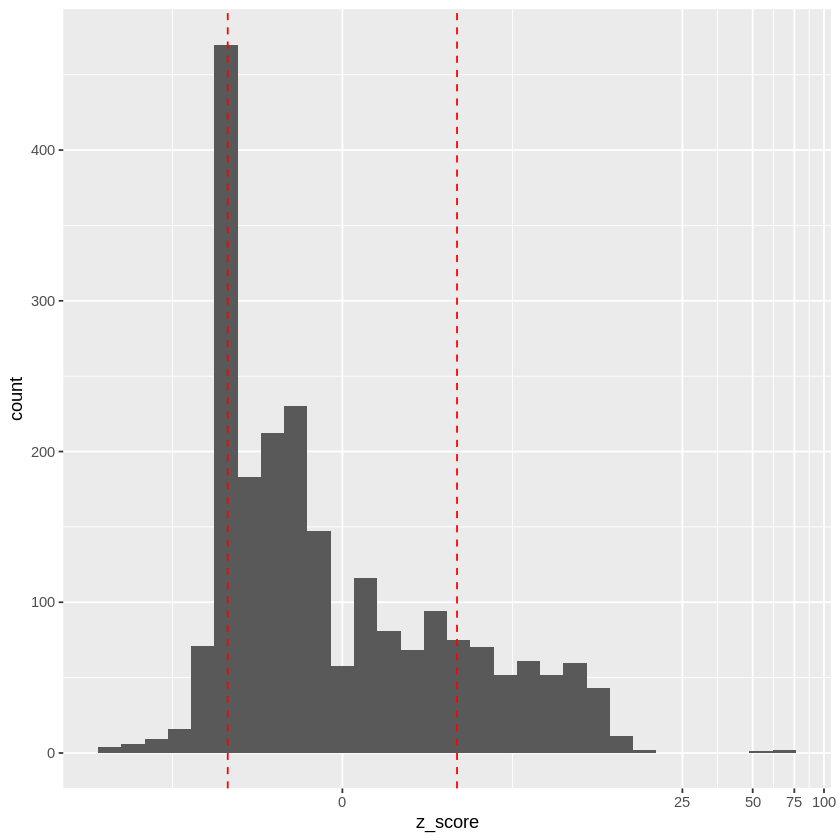

In [282]:
library(scales)

# Custom symmetric log transformation
symlog_trans <- function(base = exp(1)) {
  trans_new(name = 'symlog',
            transform = function(x) sign(x) * log1p(abs(x)),
            inverse = function(x) sign(x) * (exp(abs(x)) - 1))
}

result_dt %>%
  ggplot(aes(x=z_score))+
  geom_histogram() +
  geom_vline(color='red',linetype = 'dashed',xintercept= -2) +
  geom_vline(color='red',linetype = 'dashed',xintercept= 2) +
  xlim(-100,100)+
  scale_x_continuous(trans = symlog_trans())


In [258]:
unified_geoms <- annotated_dt[, .(geom = list(st_union(geom))), by = dist_id]

# Apply the nearest neighbors function
unified_geoms[, nn_result := lapply(geom, function(g) {
  nn <- st_nn(g, gensim_dt$geom, k = 4, returnDist = TRUE)
  # Optional: format the result to be more readable or useful
  list(index = nn$which, distance = nn$dist)
}), by = dist_id]

# View results
print(unified_geoms)

lines or polygons



  |                                                                      |   0%